# <p style = 'text-align: center;'> The Great Wolf-Moose Simulation </p>
<p style = 'text-align: center;'> Option C: Predator–Prey Dynamics </p>


### Project Topic 
> A stochastic predictive predator-pray model for Wolf and Moose populations in an Isolated Island in Michigan called Isle Royale. 

### Data Sources
* [Isle Royale Data Collection](https://isleroyalewolf.org/data/data/home.html) 
* [Spreadsheet](https://isleroyalewolf.org/sites/default/files/documents/Data_wolves_moose_Isle_Royale_June2019.xlsx)

### Data Relevance
* The data has been collected by scientists for a period of over 50 years. In otherwords, a very wide time-frame is   available which allows us the oppertunity to deeply study trends. Studying these trends will allow us to build a better basis for our simulation.  
* According to the authors "The most important events in the chronology have been essentially unpredictable." This refers to the massive dips and sharp growths of the Wolf and Moose populations due to diseases, weather, inbreeding, external wolf immigration etc.

## Library Imports

In [1]:
!pip install pint
from modsim import *

#xlrd + pandas required for scraping excel data. 
!pip install xlrd
import pandas as pd 

# RNG 
import random
np.random.seed(7)

# Plotting and MISC Math Tools
%matplotlib inline
import matplotlib.pyplot as plt
import math
import statistics as stat 

# Utility Methods

In [2]:
'''
'@param data[]: List of values. It is assumed that the values are in order i.e. each value corresponds to a year in successive order. 
'@return rates[]: Returns the growth rate for every single year. 
'Formula: (Present Population - Final Population)/Present Population 
'''
def find_growth_rates(data):
    rates = []
    for i in range(0, len(data)-1):
        init_pop = data[i]
        fin_pop  = data[i+1] 
        rate     = ((fin_pop-init_pop)/init_pop)
        rates.append(rate)
    return rates

'''
'@param data[]: List of values. It is assumed that the values are in order i.e. each value corresponds to a year in successive order. 
'@return rates[]: Returns the growth reate % for every single year. 
'Formula: [(Present Population - Final Population)/Present Population ]*100
'''
def find_growth_rates_percent(data):
    rates = []
    for i in range(0, len(data)-1):
        init_pop = data[i]
        fin_pop  = data[i+1] 
        rate     = ( ((fin_pop-init_pop)/init_pop) * 100) 
        rates.append(rate)
    return rates

'''
'not used in the final state of this notebook, but was used for testing and noodling before. 
'@param data[]: List of values. Order isn't considered. 
'@return [min, max]: Returns an array with the min and max values from the data set. 
'''
def find_min_max(data):
    min = sys.maxsize        #sentinels
    max = -1*(sys.maxsize-1) #sentinels 
    for i in data:
        if(i < min):
            min = i
        elif (i > max):
            max = i
    return [min, max]

'''
'@param val the value to be test
'@param base the base to which the upper and lower bound is added. 
'@param upper the upper bound'
'@param lower the lower bound'
'@return boolean: Returns true if a number is between upper and lower
'''

def isWithin(val=0, base=0, upper=0, lower=0):
    if(val >= base and val <= base +upper) or (val <= base and val >= base-lower):
        return True
    return False 

'''
'@data: iterable data structure.
'@return arr[]: returns a list of all negative values.
'''   

def find_neg(data):
    arr = []
    for i in data:
        if i < 0:
            arr.append(i)
    return arr
'''
'@data: iterable data structure.
'@return arr[]: returns a list of all positive values.
'''   

def find_pos(data):
    arr = []
    for i in data:
        if i >= 0:
            arr.append(i)
    return arr

## Data Cleanup

In [3]:
# Helper method that calls other methods which use the same variables. 
def cleanse_data(data,upper, lower=0):
    anomalies = find_anomalies(data,upper,lower)
    return remove_anomallies(data, anomalies)

'''
'@param data iterable data structure. 
'@param upper all values greater than this value will be treated as an outlier.
'@param lower all values lesser  than this value will be treated as an outlier
'@return anomalies[] returns the array of all outliers
'''
def find_anomalies(data, upper=0, lower=0):
    anomalies = [] 
    for i in data:
        if not isWithin(i,0,upper,lower):
            anomalies.append(i)
    return anomalies

'''
'@param data iterable data structure. 
'@param bound all values that do not lie between (-1*bound,bound) will be treated as outliers.  
'@return anomalies[] returns the array of all outliers
'''
def find_anomalies_between(data, bound):
    anomalies = [] 
    for i in data:
        if not isWithin(i,0,bound,bound):
            anomalies.append(i)
    return anomalies

'''
'@param data: iterable data structure. 
'@param anomalies[]: a data structure with all the outliers related to the data.   
'@return data: returns the updated 'data' with all outliers removed. 
'''
def remove_anomallies(data, anomalies):
    for i in anomalies:
        data.remove(i)
    return data

## Graphing

In [4]:
# Documentation ref: 
# https://pandas.pydata.org/pandas-docs/version/0.12/visualization.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

def graph_real_data(data_frame):
    graph = data_frame.plot(x ='year', secondary_y=['moose'], mark_right = False)
    graph.set_title('Isle Royale Wolf-Moose Population')
    graph.right_ax.set_ylabel('Moose-Population')
    graph.set_ylabel('Wolf-Population')
    graph.set_xlabel('Years: 1959-2019')
    

# Reading Excel Spreadsheet

In [5]:
sheet_name = '1. population level data'
file_path  = 'Wolf-Moose-Data.xlsx' 
header     = [1]
columns    = ['year','wolves','moose']
data       = pd.read_excel(file_path,
                            sheet_name,
                            header,
                            usecols=[0,1,2])
data_frame = pd.DataFrame(data)   

# Parsing Spreadsheet Data

In [6]:
wolves =  data_frame['wolves']
moose  =  data_frame['moose']
years  =  data_frame['year']

## Determining Parameter  Ranges and Growth Probabilities

### Wolves

Text(0.5, 1.0, 'Raw Wolf-Growth-Rates')

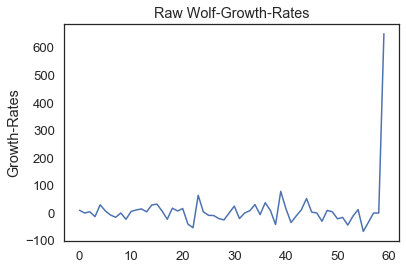

In [7]:
wolf_growth_rates  = find_growth_rates_percent(wolves)
plt.plot(wolf_growth_rates)
plt.ylabel('Growth-Rates')
plt.title("Raw Wolf-Growth-Rates" )

Targets within range	 52


Text(0.5, 1.0, 'Cleaned Wolf-Growth-Rates')

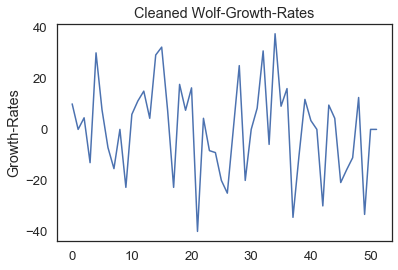

In [8]:
wolf_growth_rates        = find_growth_rates_percent(wolves)
clean_wolf_growth_rates  = cleanse_data(wolf_growth_rates,40, 40)

print("Targets within range\t", len(clean_wolf_growth_rates))

plt.plot(wolf_growth_rates)
plt.ylabel('Growth-Rates')
plt.title("Cleaned Wolf-Growth-Rates" )

## Moose

### Raw Growth Rates

[-62.47275279310348, 68.83116883116884]


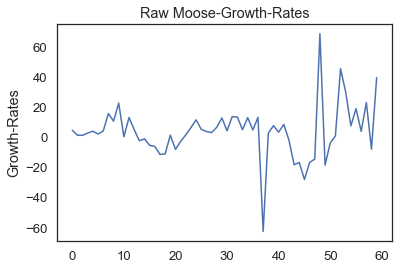

In [9]:
moose_growth_rates  = find_growth_rates_percent(moose)
moose_growth_range  = find_min_max(moose_growth_rates)
plt.plot(moose_growth_rates)
plt.ylabel('Growth-Rates')
plt.title("Raw Moose-Growth-Rates" )
print(find_min_max(moose_growth_rates))

### Cleaned Up Growth Rates

Targets within range	 50


Text(0.5, 1.0, 'Cleaned Moose-Growth-Rates')

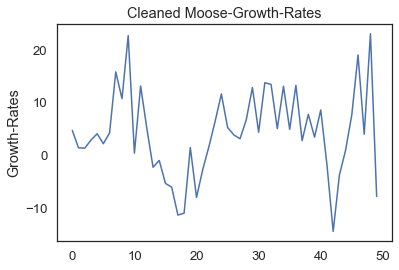

In [10]:
moose_growth_rates  = find_growth_rates_percent(moose)
clean_moose_growth_rates  = cleanse_data(moose_growth_rates,25,15)
print("Targets within range\t", len(clean_moose_growth_rates))
plt.plot(clean_moose_growth_rates)
plt.ylabel('Growth-Rates')
plt.title("Cleaned Moose-Growth-Rates" )

# Population Class

In [11]:
class Population:
    def __init__(self, init_pop=0, callsign='animals'):
        self.population = init_pop
        self.name = callsign
        self.death = False 
    
    def get_population(self): 
        return self.population
            
    def kill(self, growth_rate):
        self.population = self.population - (self.population*growth_rate/100)
        if self.population <=0:
            self.population = 0
            if self.death == False :
                self.death = True
                print('THE ', self.name, 'HAVE GONE EXTINCT!')
    
    def grow(self, growth_rate):
        self.population = self.population + (self.population*growth_rate/ 100)
        if self.population <=0:
            self.population = 0
            if self.death == False :
                self.death = True
                print('THE ', self.name, 'HAVE GONE EXTINCT!')
          


# Catastrophe Probabilities

In [12]:
def run_catastrophe_prob(chance=.50):
    return flip(chance)
'''
'Default value based on the premises that an event like this only happened once over 50 years.  
'''
def wolf_armageddon(inbreeding=1/50):
    return flip(inbreeding)


## Temperature Functions

In [13]:
# The assumption is that there is a direct proportion between %Moose-Death and $Temp.
# --> The Warmer it gets, the higher the % of the Moose Population Dies off. 
# 61% dies at 60.3F, --> (given_temp)*60.3F)/63 
def percent_temp_inc(temp): 
    return (temp*60.3)/63    #21.4*(temp - 2.8) + 60

def update_temp(temp, step):
    return temp + step


# Update-Function

## Global Stuff For Update Function

In [14]:
# All of these components are redefined down here for clarity. DO-NOT-REMOVE

moose_growth_rates  = find_growth_rates_percent(moose)
clean_moose_growth_rates  = cleanse_data(moose_growth_rates,25,15)
m_neg  = find_neg(clean_moose_growth_rates)
m_pos  = find_pos(clean_moose_growth_rates)


wolf_growth_rates        = find_growth_rates_percent(wolves)
clean_wolf_growth_rates  = cleanse_data(wolf_growth_rates,40, 40)
w_neg  = find_neg(clean_moose_growth_rates)
w_pos  = find_pos(clean_moose_growth_rates)

## Function

In [15]:
def growth(moose_pop, wolf_pop, w_thresh, m_thresh):
    # Get population at time t
    m_pop = moose_pop.get_population()
    w_pop = wolf_pop.get_population()
    # Get appropirate growth factor based on population at time t
    moose_percent = piecewise_moose_pop(m_pop, w_pop, w_thresh) 
    wolf_percent  = piecewise_wolf_pop(m_pop,w_pop, m_thresh)
    # Update populations for time (t+1) based on growth factor and time at t
    moose_pop.grow(moose_percent)
    wolf_pop.grow(wolf_percent)

def piecewise_moose_pop(m_pop, w_pop, w_thresh):
    if(w_pop > w_thresh):
        return random.choice(m_neg)
    else: 
        return random.choice(m_pos)

# (w_pop * 15)  <= m_pop 
def piecewise_wolf_pop(m_pop, w_pop, m_thresh):
    if(m_pop > m_thresh):
        return random.choice(w_pos)
    else:  
        return random.choice(w_neg)


# Simulation

In [31]:
def simulation(wolf_pop, moose_pop, t_start, t_end, 
               w_thresh, m_thresh, 
               title='Simulation Results: Wolf-Moose Population',
               temp_init = 40.0, temp_step=0):
    
    temp = temp_init
    disaster_flag = 0
    results = pd.DataFrame(columns = ['Years', 'Wolves', 'Moose'])
    

    for year in range (t_start, t_end):       
        
        temp = update_temp(temp, temp_step)
        if(temp > 63):
            moose_pop.kill(percent_temp_inc(temp))
            
        if disaster_flag > 0:
            disaster_flag -= 1
        elif run_catastrophe_prob():
            if wolf_armageddon():
                wolf_pop.kill(40)     # 40% of the wolf population will die off
                
        growth(moose_pop, wolf_pop, w_thresh, m_thresh)
        
        results = results.append({'Years':  year,
                              'Wolves': wolf_pop.get_population(),
                              'Moose':  moose_pop.get_population()}, 
                              ignore_index=True)
        
        
    graph = results.plot(x ='Years', secondary_y=['Moose'], mark_right = True)
    graph.set_title(title)
    graph.right_ax.set_ylabel('Moose')
    graph.set_ylabel('Wolf')
    graph.set_xlabel('Years:' + str(t_start) + '-' + str(t_end))
    return results

 # Parameter Sweeps

## Ordered Pairs of Moose and Wolf Population Thresholds

Wolves [Min, Max]  -->	 [10, 50]
Moose  [Min, Max]  -->	 [400, 2400]


c:\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


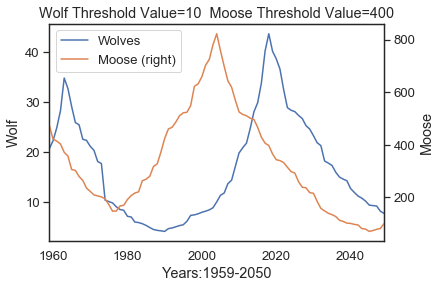

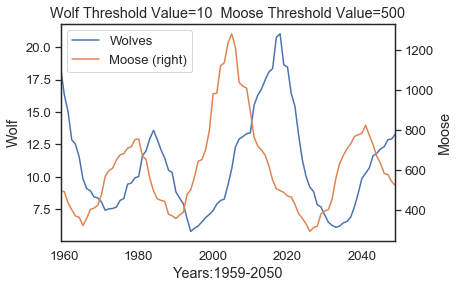

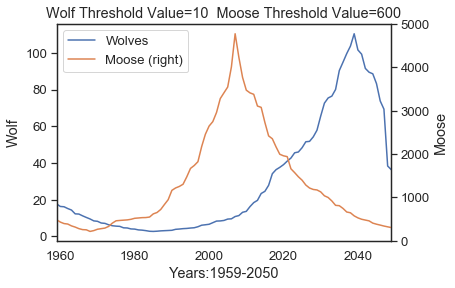

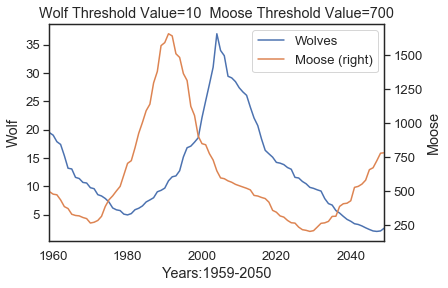

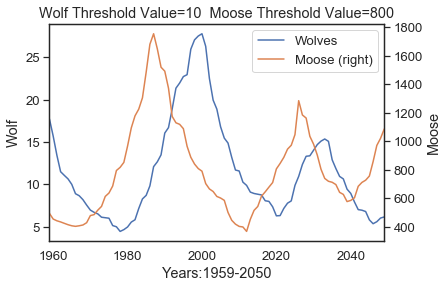

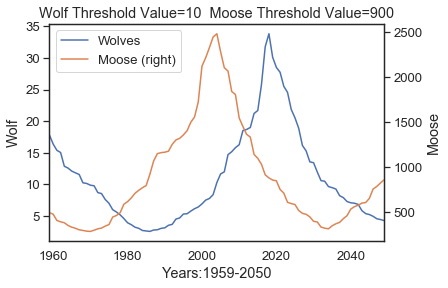

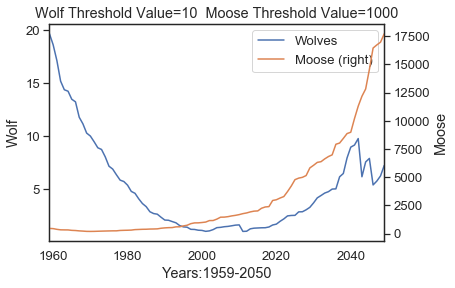

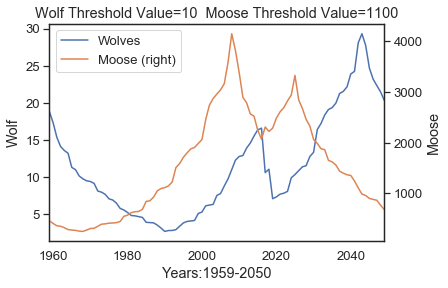

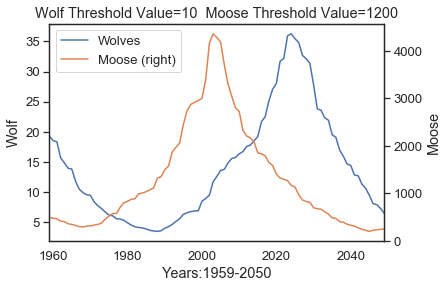

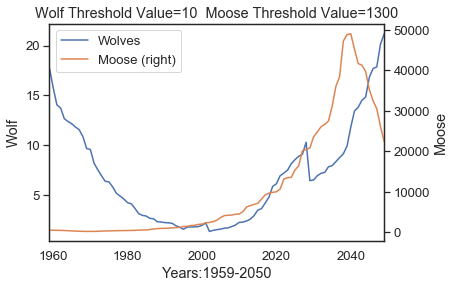

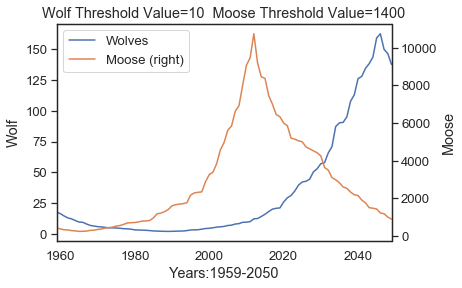

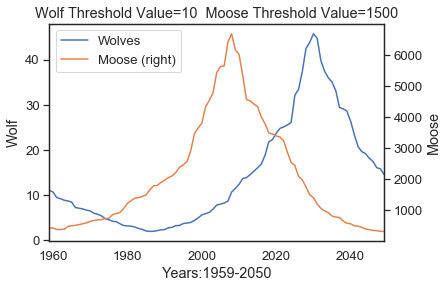

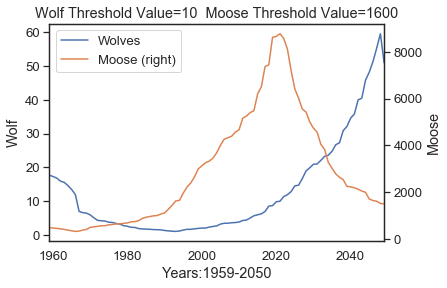

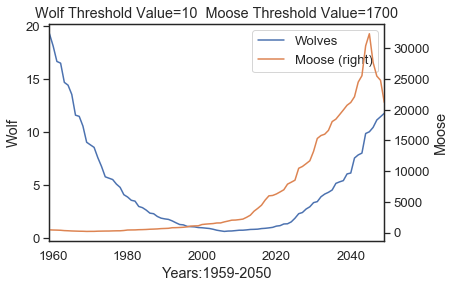

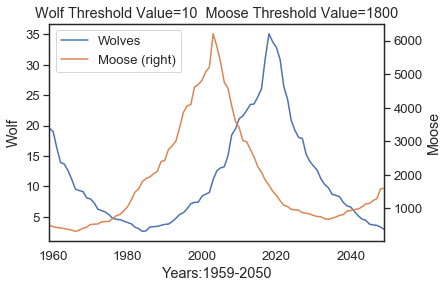

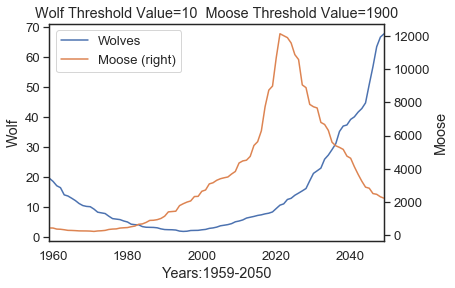

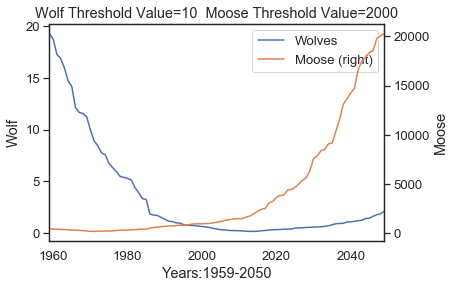

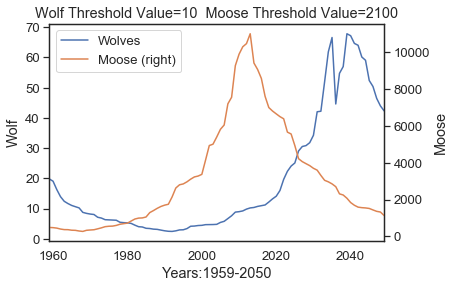

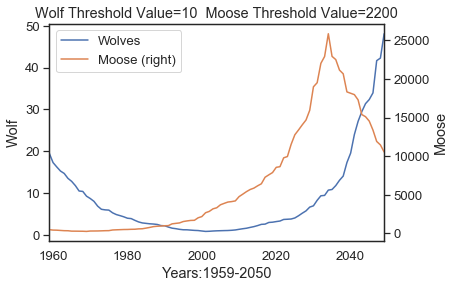

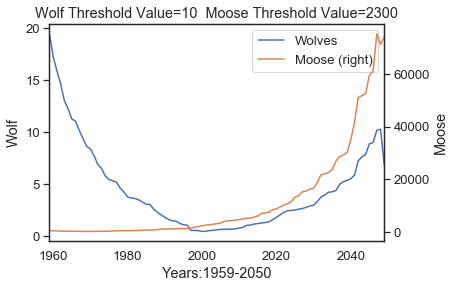

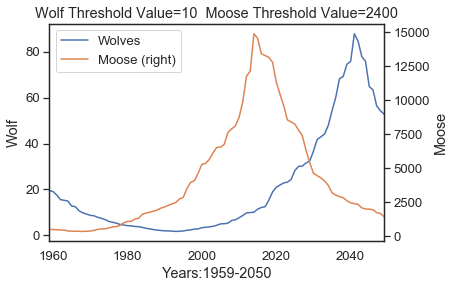

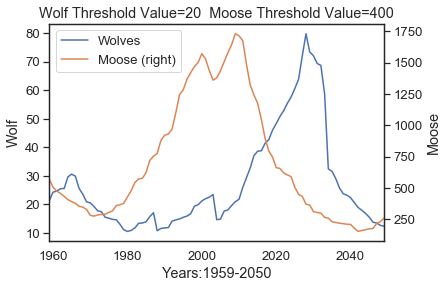

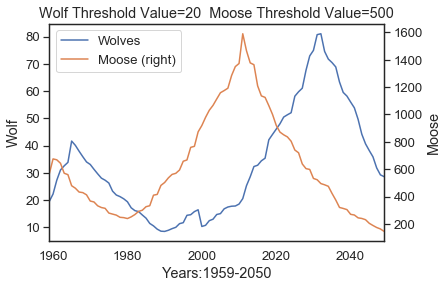

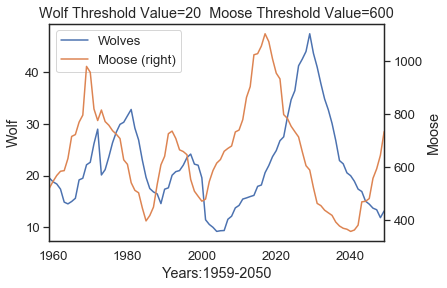

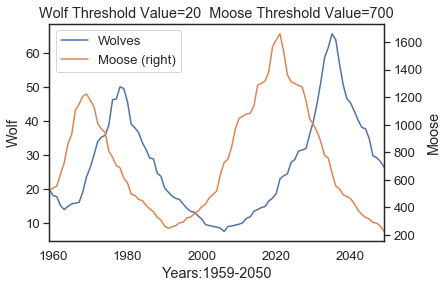

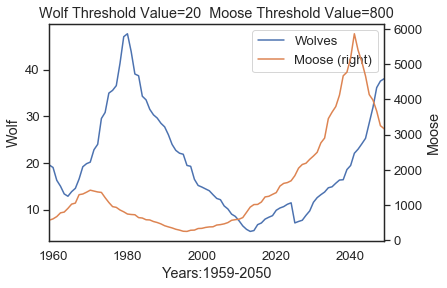

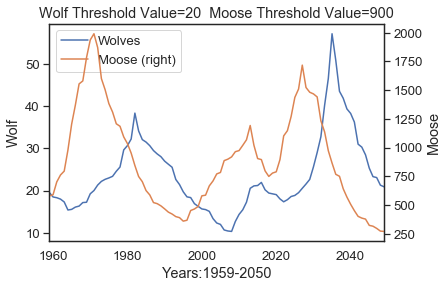

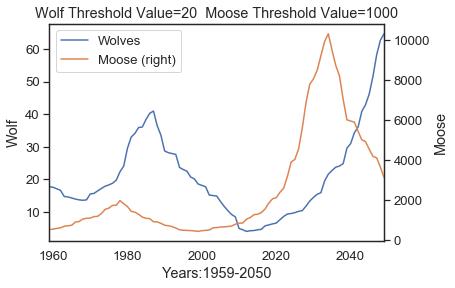

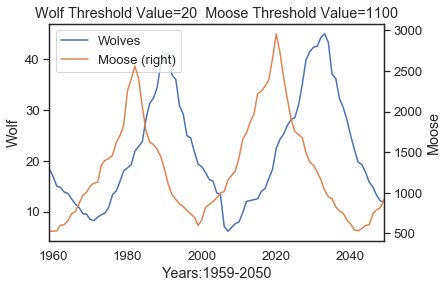

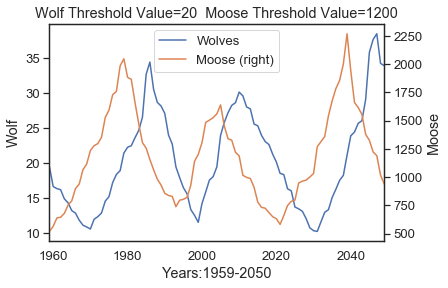

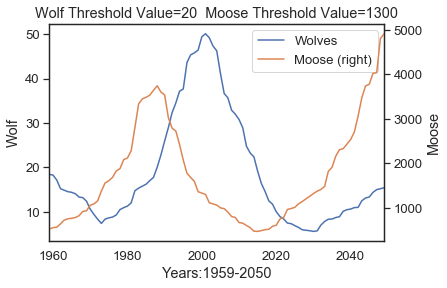

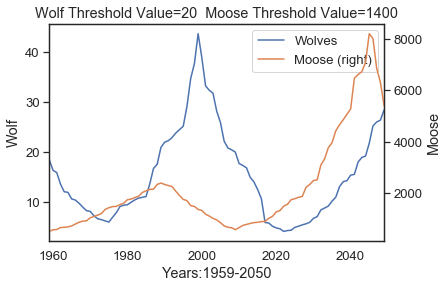

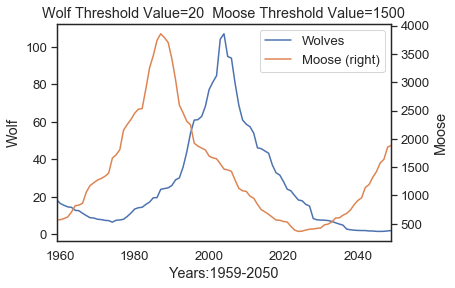

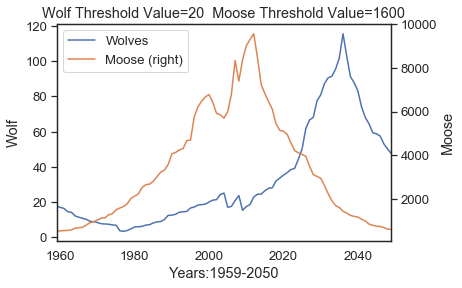

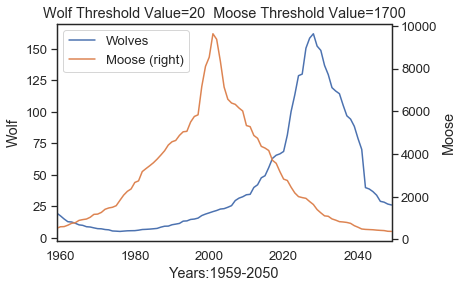

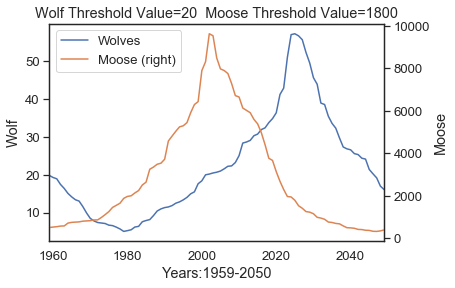

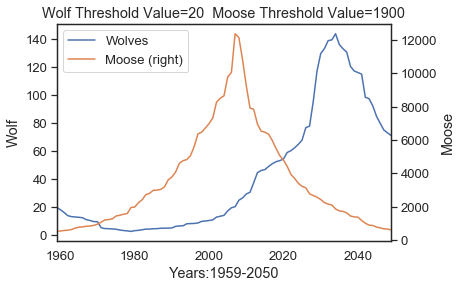

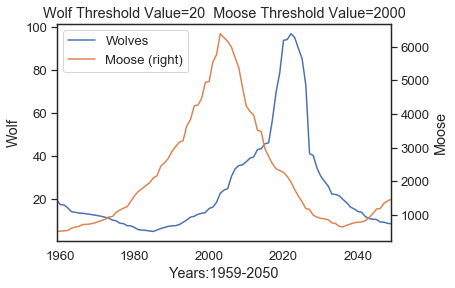

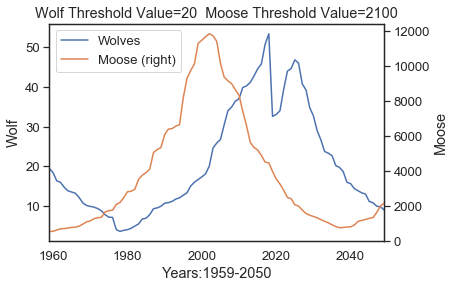

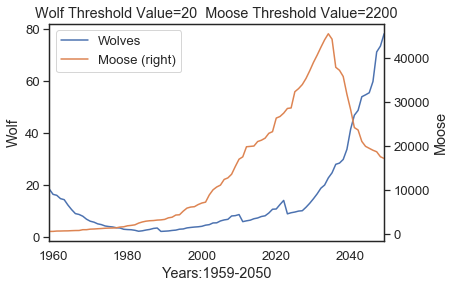

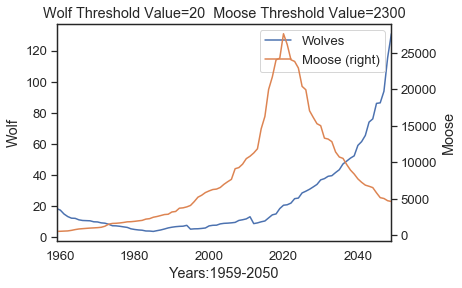

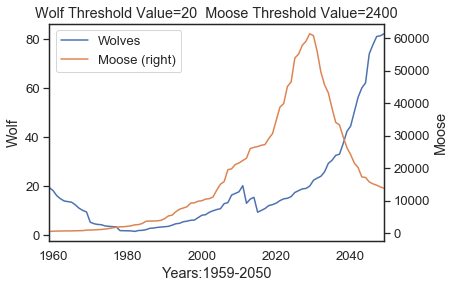

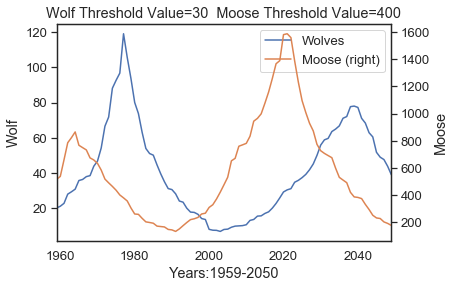

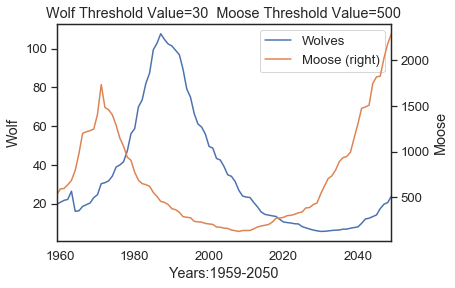

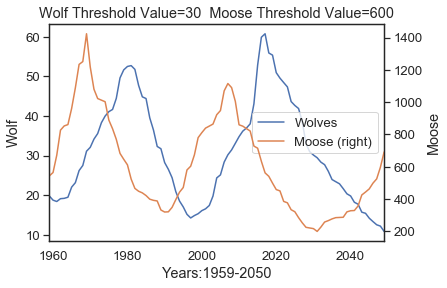

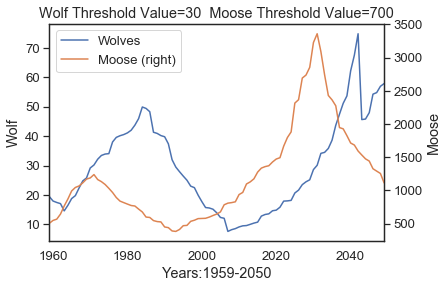

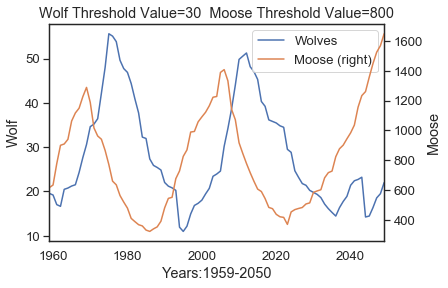

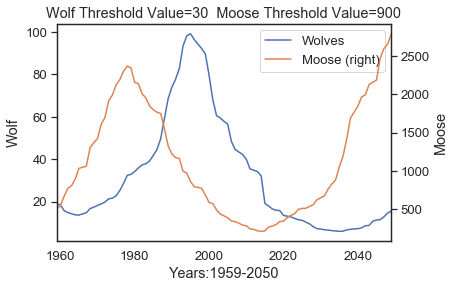

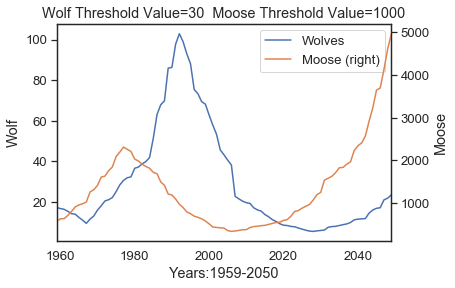

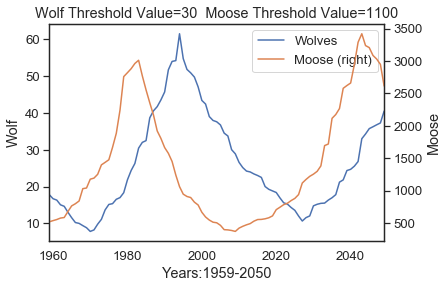

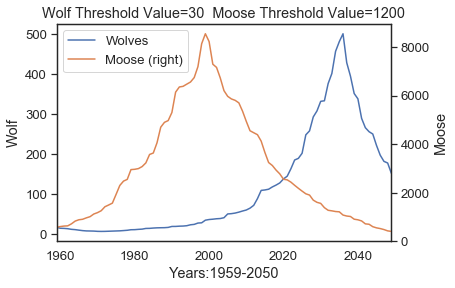

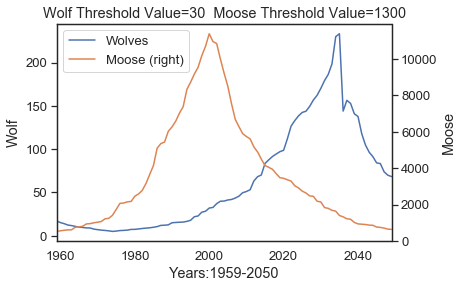

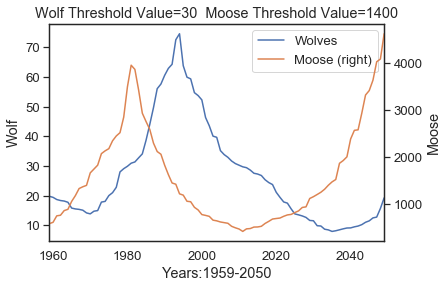

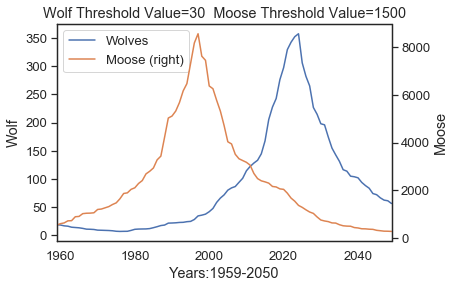

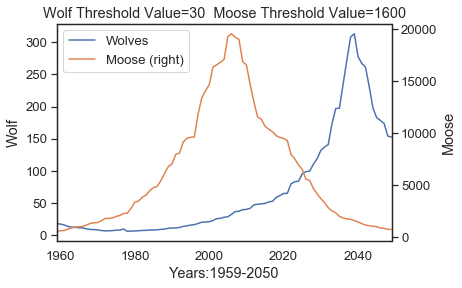

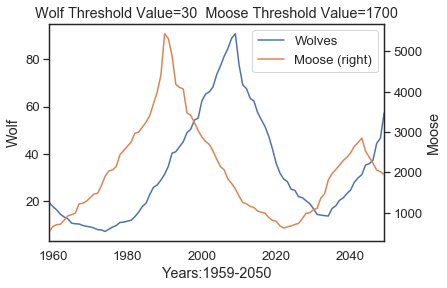

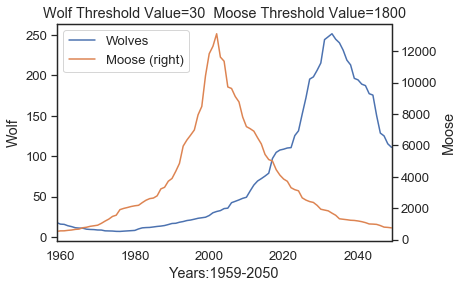

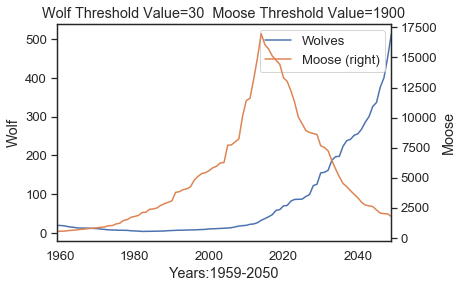

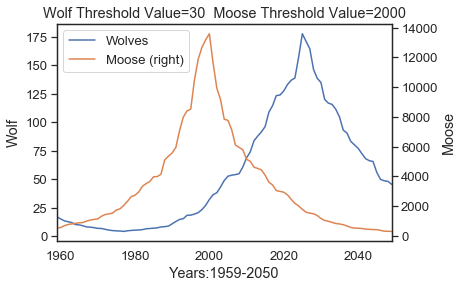

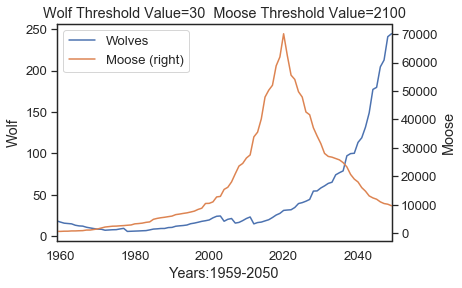

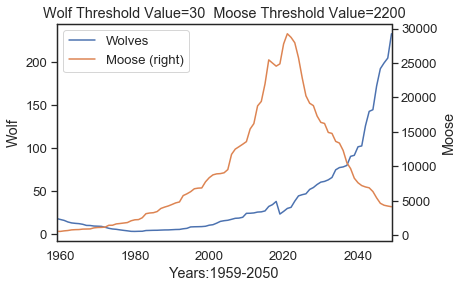

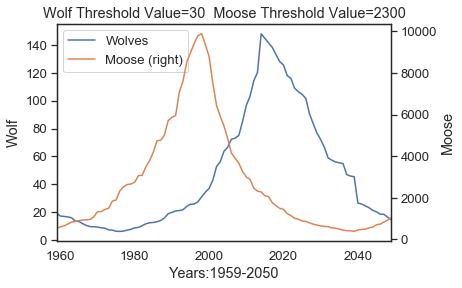

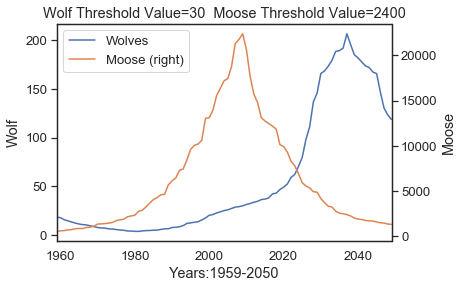

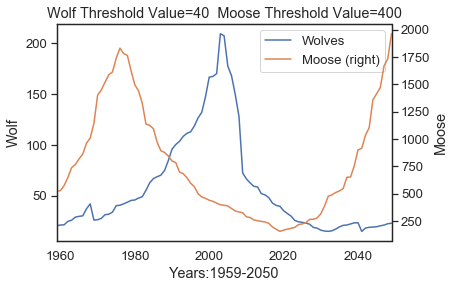

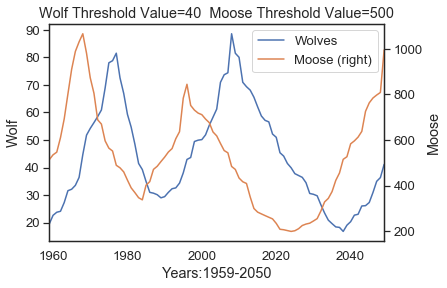

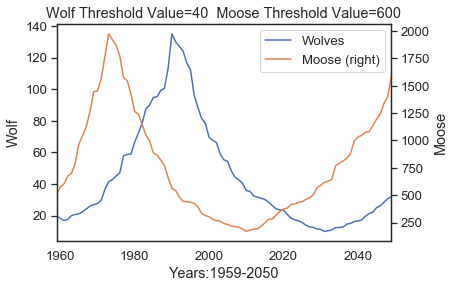

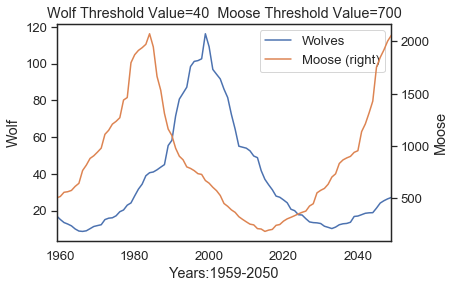

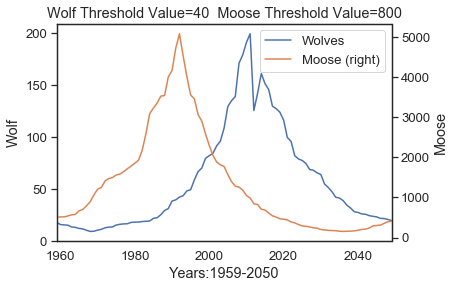

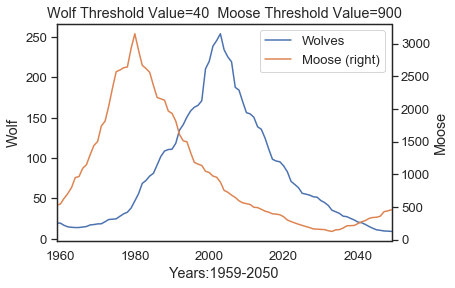

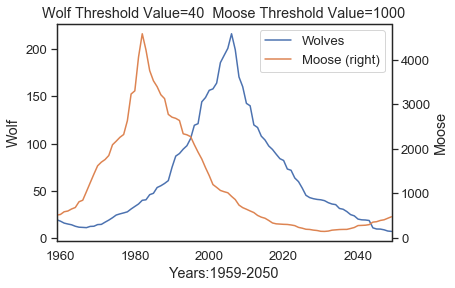

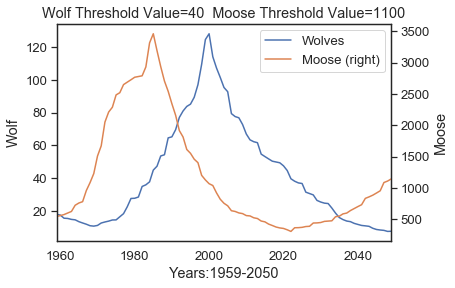

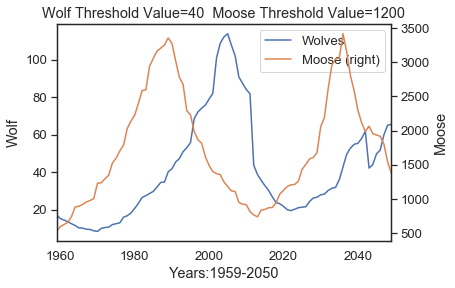

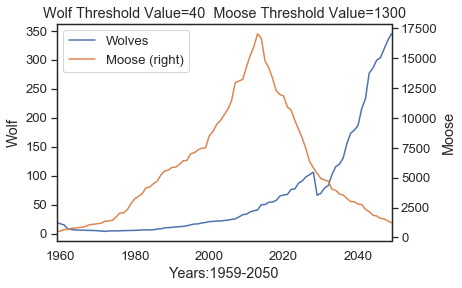

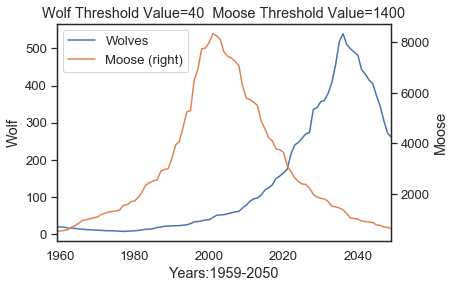

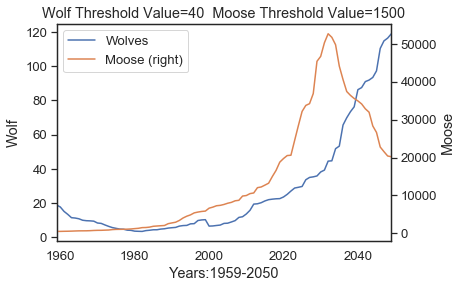

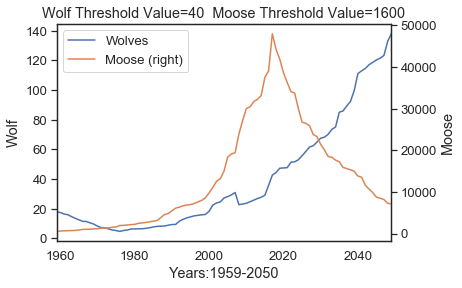

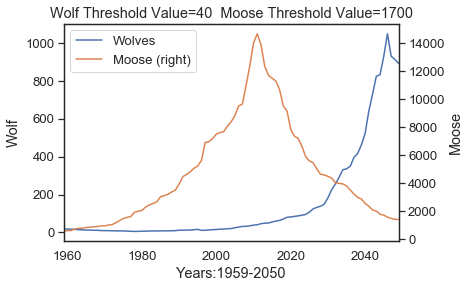

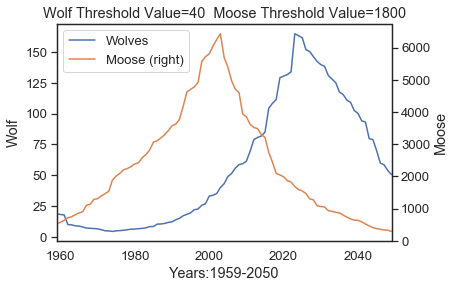

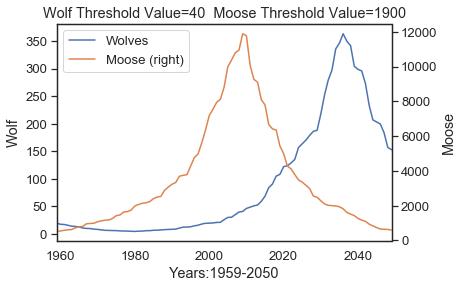

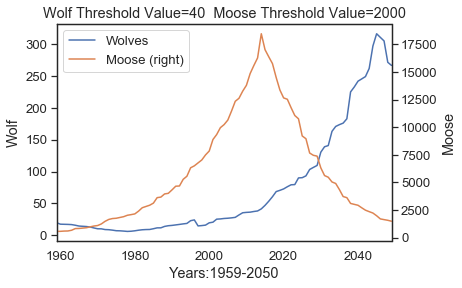

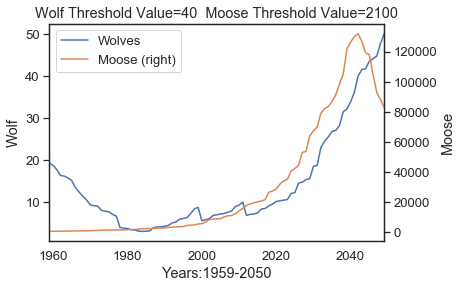

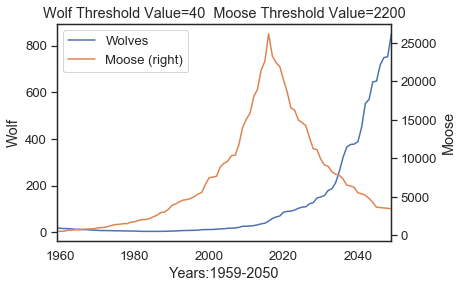

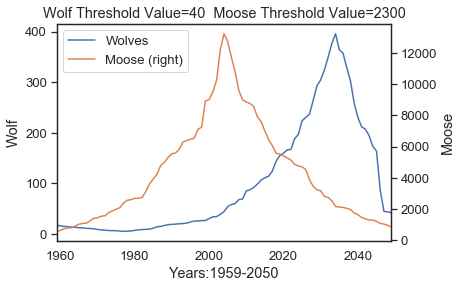

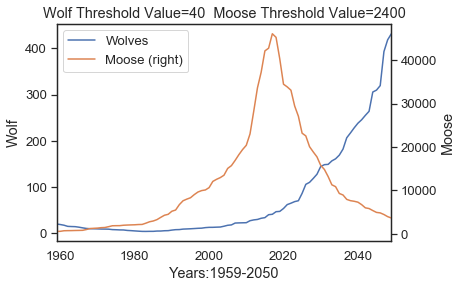

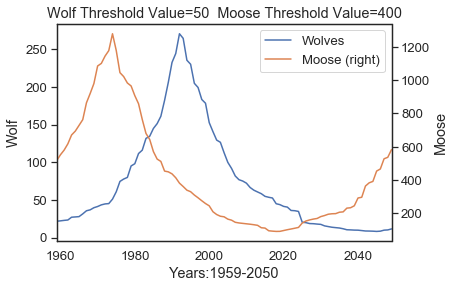

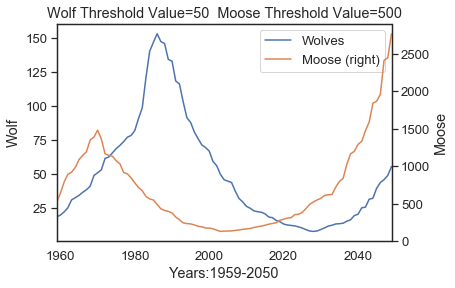

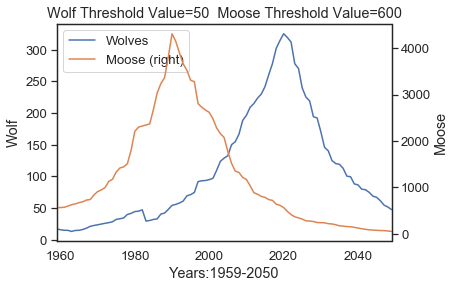

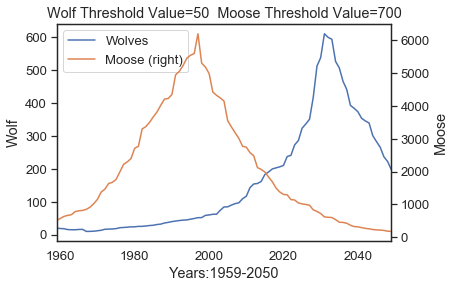

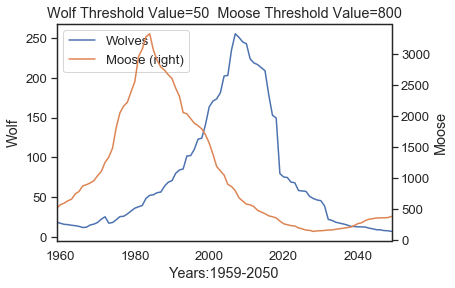

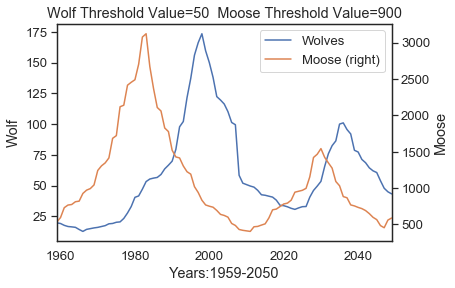

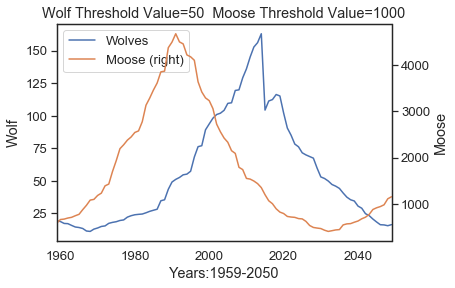

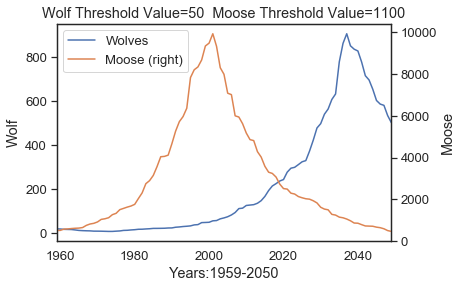

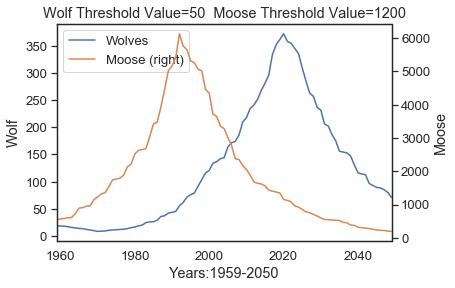

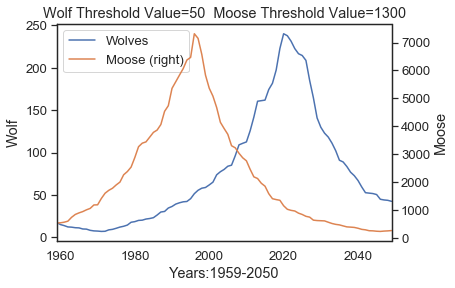

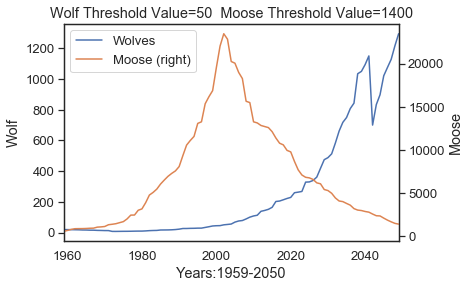

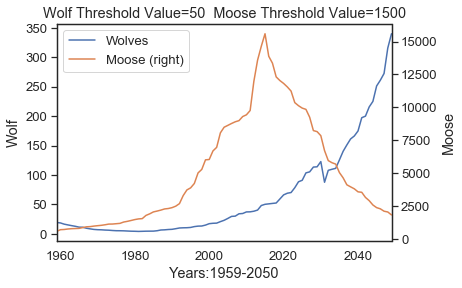

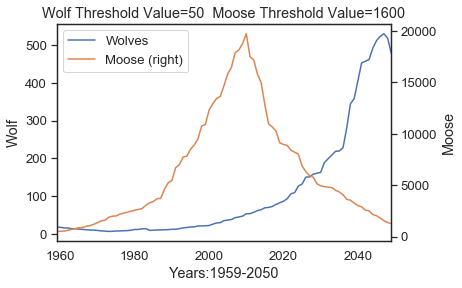

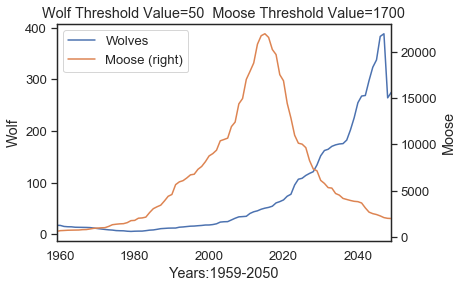

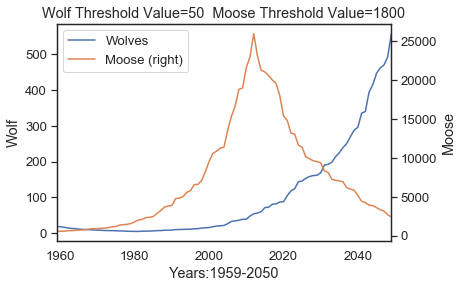

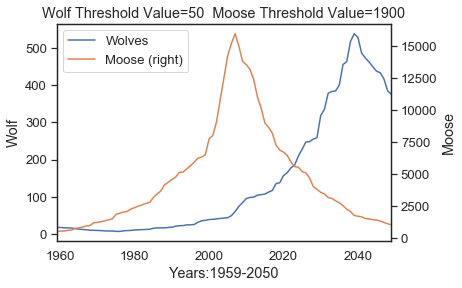

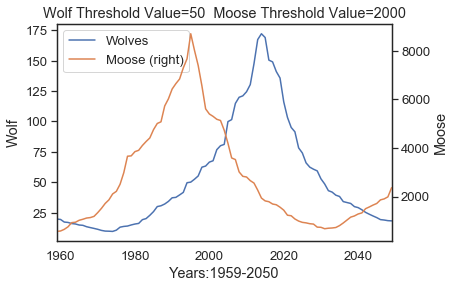

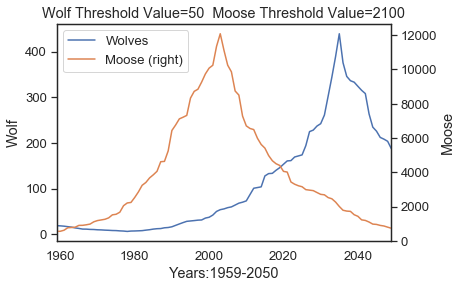

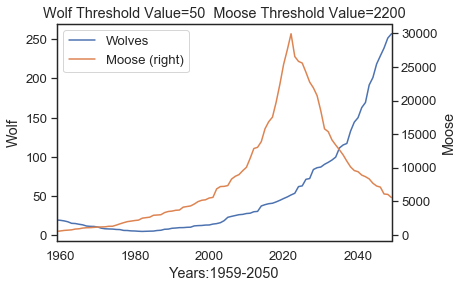

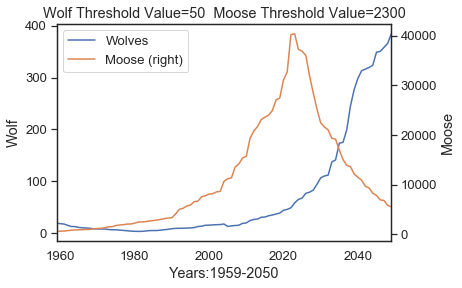

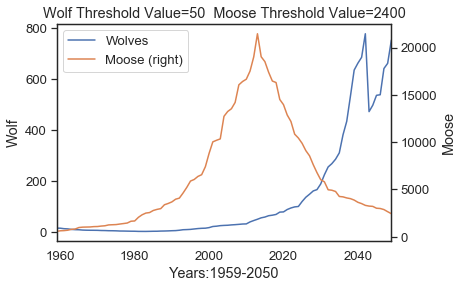

In [32]:
##########################################################################################################################
#       THIS SECTION TAKES TIME BECAUSE OF BRUTE FORCE GRAPH GENERATION. IT IS NOT AN ERROR. PLEASE BE PATIENT.          #
##########################################################################################################################

# Generate Cartesian Product Set 
# Test All Combinations of (x,y) 
# --> (x| All values between min and max wolf populations at intervals of 10)
# --> (y| All values between min and max moose populations at intervals of 50)

def gen_range(start, end, step): 
    arr = []
    num = start
    while num != (end + step):
        arr.append(num)
        num += step
    return arr 
    
wolf_min_max    = find_min_max(wolves)
#rounding off to the nearest 10th
wolf_min_max[0] = math.ceil(wolf_min_max[0]/10) * 10 
wolf_min_max[1] = math.ceil(wolf_min_max[1]/10) * 10 
print('Wolves [Min, Max]  -->\t', wolf_min_max)

moose_min_max    = find_min_max(moose)
#rounding off to the nearest 100th
moose_min_max[0] = math.ceil(moose_min_max[0]/100) * 100 
moose_min_max[1] = math.ceil(moose_min_max[1]/100) * 100 
print('Moose  [Min, Max]  -->\t', moose_min_max)


w_thresh_Range = gen_range(wolf_min_max[0], wolf_min_max[1], 10)
m_thresh_Range = gen_range(moose_min_max[0], moose_min_max[1], 100)

# Actual Sweeping Happens At This point 


for w_thresh in  w_thresh_Range:
    for m_thresh in m_thresh_Range:
        wolf_init            = 20   
        moose_init           = 500  
        t_start              = 1959 
        t_end                = 2050  
        wolves_population    = Population(wolf_init, 'WOLVES') 
        moose_population     = Population(moose_init, 'MOOSE') 
        
        title = 'Wolf Threshold Value=' + str(w_thresh) + '  Moose Threshold Value=' + str(m_thresh)
        simulation(wolves_population, moose_population, t_start, t_end, w_thresh, m_thresh, title)

        


### Conclusions
> Based on inspection of sweep results, the values which get us closest to the actual data are 20 for Wolf-Threshold and 400 for Moose-Threshold: 

## Global Warming Temperature Increase 

THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!
THE  MOOSE HAVE GONE EXTINCT!


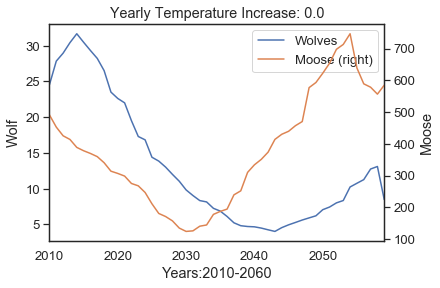

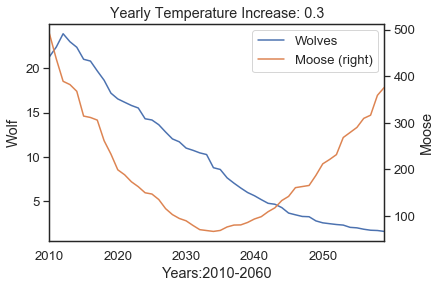

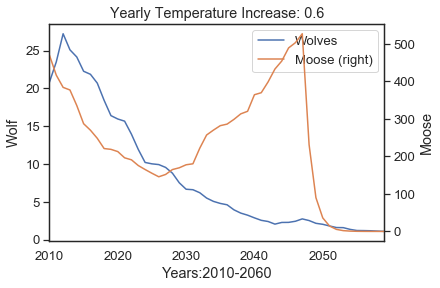

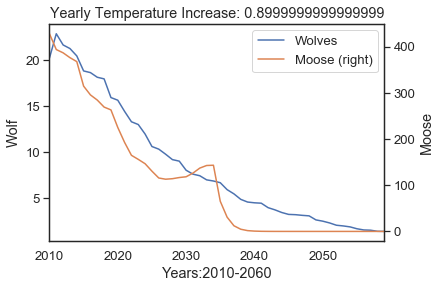

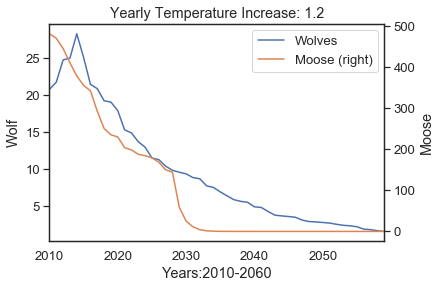

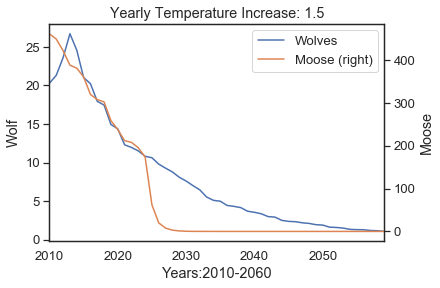

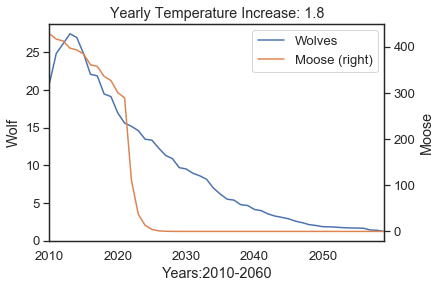

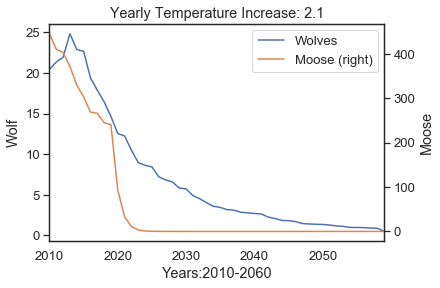

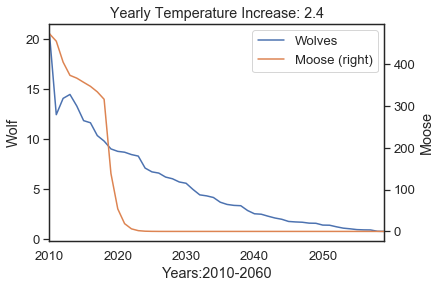

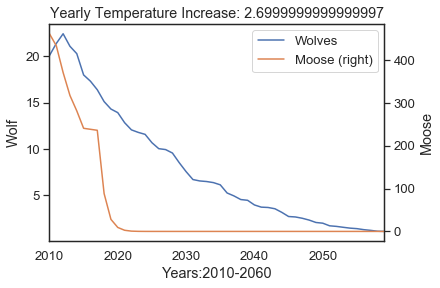

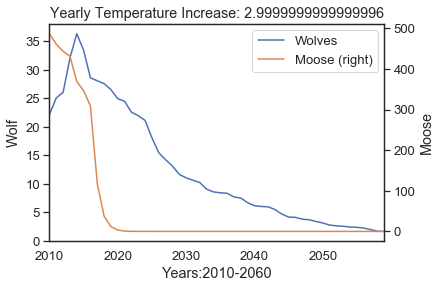

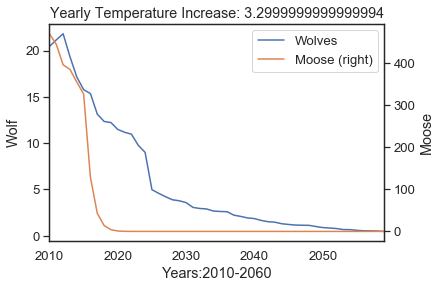

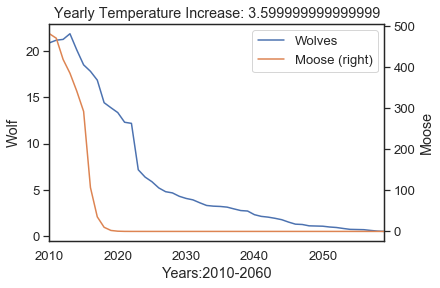

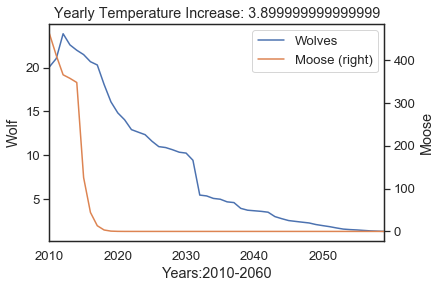

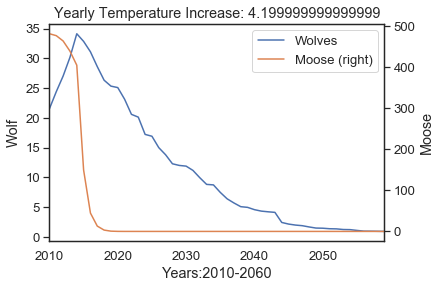

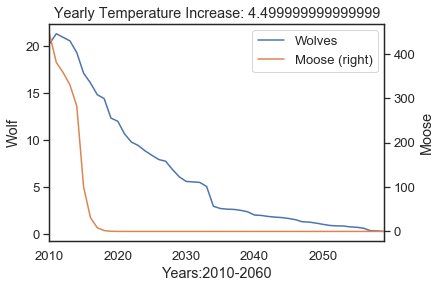

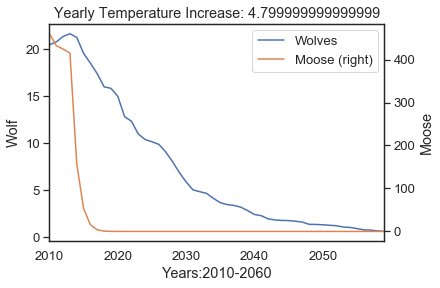

In [35]:
# Sweep Range
temps = linrange(0,5,0.3)

for t in temps:
    w_thresh             = 10
    m_thresh             = 400
    wolf_init            = 20   
    moose_init           = 500  
    t_start              = 2010 
    t_end                = 2060
    wolves_population    = Population(wolf_init, 'WOLVES') 
    moose_population     = Population(moose_init, 'MOOSE') 
    title = 'Yearly Temperature Increase: ' + str(t)    
    simulation(wolves_population, moose_population, t_start, t_end, w_thresh, m_thresh, title=title, temp_step=t)

    

## Conclusion
> After inspecting results, it is observed that if the temperatures increases increment ofbetween 0-0.3 per year, then the Moose Population will be extinct by 2050. 

# Final Configuration and Execution

Years     Wolves         Moose
0   2010.0  20.691597  4.600195e+02
1   2011.0  22.077296  4.475475e+02
2   2012.0  24.917473  4.204746e+02
3   2013.0  25.285566  4.109579e+02
4   2014.0  28.645482  3.780973e+02
..     ...        ...           ...
95  2105.0  11.257631  9.284203e-07
96  2106.0  10.952413  2.953592e-07
97  2107.0   9.710735  9.692033e-08
98  2108.0   9.490949  3.474370e-08
99  2109.0   9.276137  1.178532e-08

[100 rows x 3 columns]

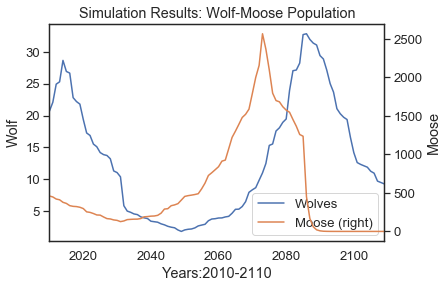

In [38]:
wolf_init            = 20   # Starting Population of Wolves. We stick to the initial populations outlined in the data.
moose_init           = 500  # Starting Population of Moose.  We stick to the initial populations outlined in the data.
t_start              = 2010 # Starting Year
t_end                = 2110 # Ending Year 
wolves_population    = Population(wolf_init, 'WOLVES') # Population Object for Wolves
moose_population     = Population(moose_init, 'MOOSE') # Population Object for Moose
w_threshold          = 10   # If wolf population is greater than this number, moose population decreases. 
m_threshold          = 400  # If moose population is less than this number, wolf population decreases.
t_step               = 0.3

simulation(wolves_population, moose_population,
           t_start, t_end, 
           w_threshold, m_threshold,
           temp_step=t_step)

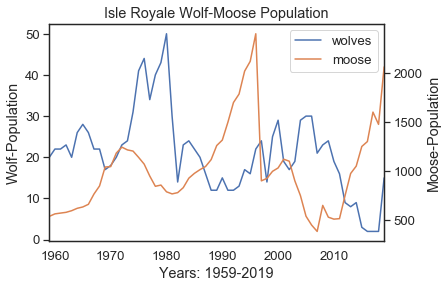

In [20]:

graph_real_data(data)